# Spatial Visibility ploting

in this code you can read WRF output and read variables by using metpy module. 
After I calculated visibility by using Song et el 2019 (https://doi.org/10.1016/j.atmosres.2019.06.011)


In [1]:
# importing all modules needed
import numpy as np
from metpy.cbook import get_test_data
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from netCDF4 import Dataset
import metpy.calc as mpcalc
from metpy.units import units

In [3]:
#  reading data
ds = xr.open_dataset("sensititvity/wrf_ysu_24112020_06.nc")
lwc = ds.metpy.parse_cf('QCLOUD')
Nd = ds.metpy.parse_cf('QNCLOUD')
Nd = Nd/1e6

### Visibility Calculations

In [4]:
lwc = (lwc*1e3)/1.3
vis = 0.511/(lwc*Nd)**0.52 #song et el 2019

### plottnig

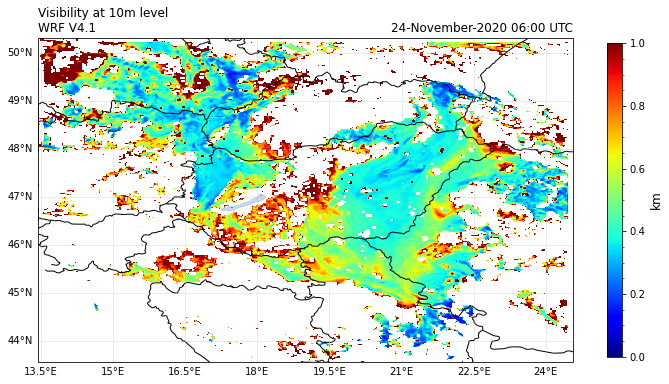

In [6]:
im_data = vis.isel(Time=0).sel(bottom_top=0)
y = vis.XLAT #reading lattitudes from variable
x = vis.XLONG #reading longitude
fig = plt.figure(figsize=(12, 12)) #open figure with size you need
ax = fig.add_subplot( projection=ccrs.PlateCarree()) #adding project within the opened figure
mp = ax.imshow(im_data,norm=None,extent=(x.min(),x.max(), y.min(), y.max())
                   ,cmap='jet', origin='lower',vmin = 0, vmax =1)

#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
       category='cultural',
       name='admin_1_states_provinces_lines',
       scale='10m',
       facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')#,alpha=0.6)
ax.add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.COASTLINE,edgecolor='white',alpha=0.6)

# adding colorbar and adjust the size
cbar = fig.colorbar(mp, shrink=0.48)
cbar.minorticks_on()
cbar.set_label('km',fontsize=12)
#cbar.set_clim(0,0.0003)
plt.title("Visibility at 10m level\nWRF V4.1",loc='left')
plt.title("24-November-2020 06:00 UTC",loc='right')
#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,edgecolor='white',alpha=0.3)
gl.top_labels = False
gl.right_labels = False
plt.savefig("Test_visb.jpg",dpi=240)